[<a href="../../../../index.html">Books to Scrape</a>, <a href="../../../../index.html">Home</a>, <a href="index.html">
<strong>Travel</strong>
</a>, <a href="../mystery_3/index.html">
                            
                                Mystery
                            
                        </a>, <a href="../historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>, <a href="../sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>, <a href="../classics_6/index.html">
                            
                                Classics
                            
                        </a>, <a href="../philosophy_7/index.html">
                            
                                Philosophy
                            
                     

<BarContainer object of 50 artists>

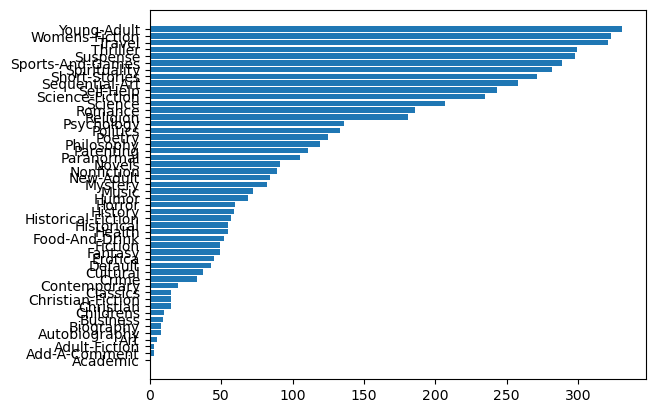

In [146]:

from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt 
#from selenium import webdriver
import requests



path = "C:\Program Files (x86)\chromedriver.exe"
#driver = webdriver.Chrome()


#Obtaining Website and Parsing It





#Category Link List Used in For Loop to Go to the Different Genres
category_link_list = ['catalogue/category/books/travel_2/index.html', 'catalogue/category/books/mystery_3/index.html', 
                 'catalogue/category/books/historical-fiction_4/index.html', 'catalogue/category/books/sequential-art_5/index.html', 
                 'catalogue/category/books/classics_6/index.html', 'catalogue/category/books/philosophy_7/index.html', 
                 'catalogue/category/books/romance_8/index.html', 'catalogue/category/books/womens-fiction_9/index.html', 
                 'catalogue/category/books/fiction_10/index.html', 'catalogue/category/books/childrens_11/index.html', 
                 'catalogue/category/books/religion_12/index.html', 'catalogue/category/books/nonfiction_13/index.html', 
                 'catalogue/category/books/music_14/index.html', 'catalogue/category/books/default_15/index.html', 
                 'catalogue/category/books/science-fiction_16/index.html', 'catalogue/category/books/sports-and-games_17/index.html',
                   'catalogue/category/books/add-a-comment_18/index.html', 'catalogue/category/books/fantasy_19/index.html',
                     'catalogue/category/books/new-adult_20/index.html', 'catalogue/category/books/young-adult_21/index.html', 
                     'catalogue/category/books/science_22/index.html', 'catalogue/category/books/poetry_23/index.html', 
                     'catalogue/category/books/paranormal_24/index.html', 'catalogue/category/books/art_25/index.html', 
                     'catalogue/category/books/psychology_26/index.html', 'catalogue/category/books/autobiography_27/index.html', 
                     'catalogue/category/books/parenting_28/index.html', 'catalogue/category/books/adult-fiction_29/index.html', 'catalogue/category/books/humor_30/index.html', 'catalogue/category/books/horror_31/index.html', 'catalogue/category/books/history_32/index.html', 'catalogue/category/books/food-and-drink_33/index.html', 'catalogue/category/books/christian-fiction_34/index.html', 'catalogue/category/books/business_35/index.html', 'catalogue/category/books/biography_36/index.html', 'catalogue/category/books/thriller_37/index.html', 'catalogue/category/books/contemporary_38/index.html', 'catalogue/category/books/spirituality_39/index.html', 'catalogue/category/books/academic_40/index.html', 'catalogue/category/books/self-help_41/index.html', 'catalogue/category/books/historical_42/index.html', 'catalogue/category/books/christian_43/index.html', 'catalogue/category/books/suspense_44/index.html', 'catalogue/category/books/short-stories_45/index.html', 'catalogue/category/books/novels_46/index.html', 'catalogue/category/books/health_47/index.html', 'catalogue/category/books/politics_48/index.html', 'catalogue/category/books/cultural_49/index.html', 'catalogue/category/books/erotica_50/index.html', 'catalogue/category/books/crime_51/index.html']





#Was Extracted using this Code
# genres_find_object  = html_object.find_all("li")


# cateogry_link_list = []
# category_list = []

# nonetype = type(None)

# for n in range(len(genres_find_object)):
#     if isinstance(genres_find_object[n].find("a"),nonetype):
#         pass
#     else:
#         if "category" in genres_find_object[n].find("a").get("href"):
#             cateogry_link_list.append(genres_find_object[n].find("a").get("href"))
#del cateogry_link_list[0]

#Name of Categories, Extracted Using Below Code
category_list = ['Travel', 'Mystery', 'Historical-Fiction', 'Sequential-Art', 'Classics', 'Philosophy', 'Romance', 'Womens-Fiction', 'Fiction', 'Childrens', 'Religion', 'Nonfiction', 'Music', 'Default', 'Science-Fiction', 'Sports-And-Games', 'Add-A-Comment', 'Fantasy', 'New-Adult', 'Young-Adult', 'Science', 'Poetry', 'Paranormal', 'Art', 'Psychology', 'Autobiography', 'Parenting', 'Adult-Fiction', 'Humor', 'Horror', 'History', 'Food-And-Drink', 'Christian-Fiction', 'Business', 'Biography', 'Thriller', 'Contemporary', 'Spirituality', 'Academic', 'Self-Help', 'Historical', 'Christian', 'Suspense', 'Short-Stories', 'Novels', 'Health', 'Politics', 'Cultural', 'Erotica', 'Crime']

#index = 25 #Where the Third Slash Appears    
# for n in range(len(category_link_list)):
#     genre = category_link_list[n][index:category_link_list[n].index("_")]
#     category_list.append(genre.title())


#####Start of Main Loop####
data_frame_dictionary = {"Titles":[],"Stock_List":[],"Ratings":[],"Prices":[],"UPC":[],"Category":[]}
base_url_main = "https://books.toscrape.com/"
for n in range(len(category_link_list)):
    current_index = n
    # current_category = category_list[n]
    # for n in range(len(titles_list)):
    #     data_frame_dictionary["Category"].append(current_category)

    
    url = base_url_main+category_link_list[n]
    request_object = requests.get(url) 
    html_object = BeautifulSoup(request_object.text,"html.parser")

    """ """ #Find Objects
    find_title_object = html_object.find_all("a",{"href": lambda x : "books" not in x.strip("/")}, lambda x: "title" in x.attrs())
    find_ratings_object = html_object.find_all("p",{"class":lambda x: "star-rating" in x})
    find_price_object = html_object.find_all("p",{"class":"price_color"})

    #All The Lists (to be inserted into Pandas Data Frame After Scraping)


    titles_list = []
    stock_list = []
    stock_list= []
    upc_list = []
    ratings_list = []
    prices_list = []
    cat = []
    print(find_title_object)
    #For Loop for Extracting The Title 
    for n in range(len(find_title_object)):
        if isinstance(find_title_object[n].get("title"), str):
            titles_list.append(find_title_object[n].get("title"))
            cat.append(category_list[current_index])
            
        

        else:
            pass

    data_frame_dictionary["Titles"].extend(titles_list) 
    data_frame_dictionary["Category"].extend(cat)      
    #For Loop for Extracting the Stock Quanitty and UPC
    nums_list = ["0","1","2","3","4","5","6","7","8","9"]
    for n in range(len(find_title_object)):
        if isinstance(find_title_object[n].get("title"), str):
            base_url_stock = "https://books.toscrape.com/catalogue/"
            
            base_url_stock = base_url_stock+find_title_object[n].get("href").lstrip("../../")
            print(base_url_stock)

        

            request_stock = requests.get(base_url_stock)
            html_stock = BeautifulSoup(request_stock.text, "html.parser")
            stock_available = html_stock.find_all("td", text=lambda x: "available" in x)[0].text
            upc_list.append(html_stock.find_all("td")[0].text)
            stock_text = ""
            for n in stock_available:
                if n in nums_list:
                    stock_text = stock_text+n
                else:
                    pass
            stock_list.append(int(stock_text))
        else:
            pass
    nums_list = ["0","1","2","3","4","5","6","7","8","9"]
    data_frame_dictionary["Stock_List"].extend(stock_list)
    data_frame_dictionary['UPC'].extend(upc_list)


    #For Loop for Extracting the Ratings
    for n in range(len(find_ratings_object)):
        ratings_list.append(find_ratings_object[n].get("class")[1])
    data_frame_dictionary["Ratings"].extend(ratings_list)

    #For Loop for Extracting the Prices
    for n in range(len(find_price_object)):
        prices_list.append(find_price_object[n].text.strip("Â"))
    data_frame_dictionary["Prices"].extend(prices_list)

 
  
print(data_frame_dictionary)
data_frame = pd.DataFrame(data_frame_dictionary)
category_group = data_frame.groupby(by="Category").sum()
category_group_names = data_frame.groupby(by="Category")
category_group.sort_values(by="Stock_List",ascending=True, inplace=True)
category_group = category_group.head(8)
stock_agg = category_group["Stock_List"].values.tolist()

stock_labels = list(category_group_names.groups.keys())
plt.barh(stock_labels, stock_agg)
plt.xlabel("Stock")
plt.ylabel("Genre")
plt.title("8 Genres with the Highest Quantity in Stock")



In [154]:

nums_list = ["One","Two","Three","Four","Five"]
def rtn(x):
    index = nums_list.index(x)
    return(index+1)
data_frame["Ratings_Num"] = data_frame["Ratings"].apply(lambda x: rtn(x))
data_frame



,Titles,Stock_List,Ratings,Prices,UPC,Category,Ratings_Num
0,It's Only the Himalayas,19,Two,£45.17,a22124811bfa8350,Travel,2
1,Full Moon over Noahâs Ark: An Odyssey to Mou...,15,Four,£49.43,ce60436f52c5ee68,Travel,4
2,See America: A Celebration of Our National Par...,14,Three,£48.87,f9705c362f070608,Travel,3
3,Vagabonding: An Uncommon Guide to the Art of L...,8,Two,£36.94,1809259a5a5f1d8d,Travel,2
4,Under the Tuscan Sun,7,Three,£37.33,a94350ee74deaa07,Travel,3
...,...,...,...,...,...,...,...
512,Why the Right Went Wrong: Conservatism--From G...,14,Four,£52.65,2b5054a4192e9b06,Politics,4
513,Equal Is Unfair: America's Misguided Fight Aga...,12,One,£56.86,3968e3fbf4695d7c,Politics,1
514,Amid the Chaos,15,One,£36.58,bb8245f52c7cce8f,Cultural,1
515,Dark Notes,15,Five,£19.19,88c21fcd38e2486e,Erotica,5
